In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
raw = pd.read_csv("raw_camera6-0400-0415.csv" )
new = pd.read_csv("true_camera6-0400-0415.csv")

In [21]:
raw.shape

(196411, 18)

In [22]:
df = raw.merge(new, how = "inner", on = ["Vehicle_ID", "Frame_ID"], suffixes=["_raw","_new"])

In [23]:
df.loc[:, df.columns.str.contains("Ac")]

,v_Acc_raw,v_Acc_new
0,7.23,0.288891
1,3.54,0.590179
2,0.67,0.940422
3,-0.31,1.309290
4,0.22,1.665305
...,...,...
196406,1.27,1.852183
196407,11.20,1.627620
196408,11.20,1.176378
196409,6.41,0.663035


In [24]:
df

,Vehicle_ID,Frame_ID,Total_Frames_raw,Global_Time_raw,Local_X_raw,Local_Y_raw,Global_X_raw,Global_Y_raw,v_Length_raw,v_Width_raw,...,v_Length_new,v_Width_new,v_Class_new,v_Vel_new,v_Acc_new,Lane_ID_new,Preceding_new,Following_new,Space_Headway_new,Time_Headway_new
0,1.0,743.0,884.0,1.113433e+12,16.753,1255.157,6042680.296,2134314.235,14.3,6.4,...,0.0,0.0,0.0,18.512937,0.288891,2.0,4227.0,11.0,0.0,0.0
1,1.0,744.0,884.0,1.113433e+12,16.710,1257.448,6042679.875,2134316.505,14.3,6.4,...,0.0,0.0,0.0,18.565725,0.590179,2.0,4227.0,11.0,0.0,0.0
2,1.0,745.0,884.0,1.113433e+12,16.654,1259.772,6042679.438,2134318.792,14.3,6.4,...,0.0,0.0,0.0,18.657105,0.940422,2.0,4227.0,11.0,0.0,0.0
3,1.0,746.0,884.0,1.113433e+12,16.597,1262.092,6042679.004,2134321.060,14.3,6.4,...,0.0,0.0,0.0,18.790235,1.309290,2.0,4227.0,11.0,0.0,0.0
4,1.0,747.0,884.0,1.113433e+12,16.543,1264.399,6042678.572,2134323.329,14.3,6.4,...,0.0,0.0,0.0,18.962361,1.665305,2.0,4227.0,11.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196406,3366.0,3199.0,291.0,1.113433e+12,3.077,1452.284,6042635.110,2134506.440,16.8,6.9,...,0.0,0.0,0.0,61.659812,1.852183,1.0,0.0,978.0,0.0,0.0
196407,3366.0,3200.0,291.0,1.113433e+12,3.044,1458.088,6042634.080,2134512.545,16.8,6.9,...,0.0,0.0,0.0,61.841169,1.627620,1.0,0.0,978.0,0.0,0.0
196408,3366.0,3201.0,291.0,1.113433e+12,3.020,1464.198,6042633.117,2134518.290,16.8,6.9,...,0.0,0.0,0.0,61.984163,1.176378,1.0,0.0,978.0,0.0,0.0
196409,3366.0,3202.0,291.0,1.113433e+12,3.020,1470.502,6042632.102,2134524.508,16.8,6.9,...,0.0,0.0,0.0,62.130741,0.663035,1.0,0.0,978.0,0.0,0.0


In [25]:
df.loc[:, df.columns.str.contains("Local")].sample(10)

,Local_X_raw,Local_Y_raw,Local_X_new,Local_Y_new
6164,54.057,1456.208,0.0,1442.32
77629,53.526,1384.115,0.0,1369.52
42022,12.357,1422.139,0.0,1409.01
45716,16.814,1379.318,0.0,1369.90
192568,41.711,1469.701,0.0,1454.13
16117,6.611,1383.251,0.0,1377.09
123266,16.316,1359.961,0.0,1344.41
184608,55.387,1465.181,0.0,1445.82
9328,68.616,1422.978,0.0,1409.63
48173,65.953,1412.704,0.0,1363.23


In [26]:
df[(df.Local_Y_raw - df.Local_Y_new) > 30][["Local_Y_raw", "Local_Y_new"]]

,Local_Y_raw,Local_Y_new
897,1362.380,1332.36
902,1375.454,1345.44
903,1378.376,1348.11
904,1381.267,1350.80
905,1384.080,1353.49
...,...,...
195509,1512.781,1453.77
195510,1518.284,1459.18
195511,1524.008,1464.59
195512,1529.846,1469.99


In [27]:
class Comparison():
    
    def __init__(self, input_data, true_data):
        self.input_data = input_data
        self.true_data = true_data
        self.df = self.input_data.merge(self.true_data, how = "inner", on = ["Vehicle_ID", "Frame_ID"], suffixes=["_raw","_new"])
        
    def MSE_speed(self):
        self.df["Vel_diff"] = self.df["v_Vel_raw"] - self.df["v_Vel_new"]
        return np.sum(self.df["Vel_diff"] **2)/self.df.shape[0]
    
    def MSE_acce(self):
        self.df["Acc_diff"] = self.df["v_Acc_raw"] - self.df["v_Acc_new"]
        return np.sum(self.df["Acc_diff"] **2)/self.df.shape[0]
    
    def MSE_loc(self):
        self.df["LocY_diff"] = self.df["Local_Y_raw"] - self.df["Local_Y_new"]
        return np.sum(self.df["LocY_diff"] **2)/self.df.shape[0]
    
        

In [28]:
c = Comparison(raw, new)

c.MSE_acce()

29.968966997236112

In [29]:
c.MSE_speed()

7.979435575881515

In [30]:
c.MSE_loc()

380.28473698268266

In [31]:
np.sum((df["v_Vel_raw"] - df["v_Vel_new"]) **2)/df.shape[0]

7.979435575881515

In [32]:
np.sum((df["v_Acc_raw"] - df["v_Acc_new"]) **2)/df.shape[0]

29.968966997236112

In [33]:
df["v_Vel_raw"] - df["v_Vel_new"]

0         3.807063
1         4.284275
2         4.432895
3         4.329765
4         4.157639
            ...   
196406   -1.679812
196407   -0.981169
196408    0.445837
196409    1.779259
196410    2.272420
Length: 196411, dtype: float64

In [34]:
df["Vel_diff"] = df["v_Vel_raw"] - df["v_Vel_new"]
df.groupby("Lane_ID_new").mean()["Vel_diff"]

Lane_ID_new
1.0    1.696125
2.0    0.512742
3.0    0.596758
4.0    0.362744
5.0    0.368192
6.0    0.526293
9.0    0.454319
Name: Vel_diff, dtype: float64

(-6.0, 6.0)

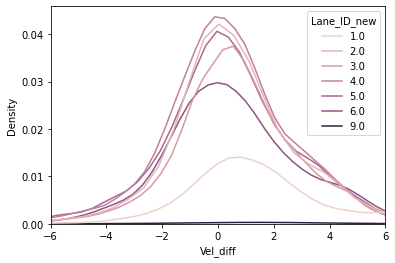

In [35]:
ax = sns.kdeplot(data = df, x = df["Vel_diff"], hue = "Lane_ID_new")
ax.set_xlim((-6,6))

In [36]:
df[df["Lane_ID_new"] != df["Lane_ID_raw"]][["Lane_ID_new", "Lane_ID_raw"]]

,Lane_ID_new,Lane_ID_raw
592,5.0,4.0
593,5.0,4.0
594,5.0,4.0
595,5.0,4.0
596,5.0,4.0
...,...,...
196311,4.0,3.0
196312,4.0,3.0
196313,4.0,3.0
196314,4.0,3.0
